## Save Signal -> Photodiode

In [32]:
import os
import cv2
import h5py
import numpy as np
import matplotlib.pyplot as plt
from analyses.video_parsing_external import get_frames

file_name = '/Users/rahimhashim/Library/CloudStorage/GoogleDrive-rh2898@columbia.edu/.shortcut-targets-by-id/1weRx7ojG3amil91WgRMeTUVxse__Rsyt/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/data_Probabilistic_Reward_Airpuff_Choice/230810_Test2_cam.h5'
f = h5py.File(file_name, 'r')
frame_sig = np.array(f['ML']['Trial1']['AnalogData']['General']['Gen2'])[0]
save_sig = np.array(f['ML']['Trial1']['AnalogData']['General']['Gen3'])[0]
photodiode = np.array(f['ML']['Trial1']['AnalogData']['PhotoDiode'])[0]

first_save_frame = np.where(save_sig > 1)[0][0]
first_photodiode_frame = np.where(photodiode > 1)[0][0]
first_sync_frame = np.where(frame_sig > 1)[0][0]
# find where edge of sync and save frames are both high, which means the sync pulse goes from <1 to >1
frame_sig_high = np.array([i for i, x in enumerate(frame_sig) if x > 1 and frame_sig[i-1] < 1])
frame_sig_array = np.zeros(len(frame_sig))
frame_sig_array[frame_sig_high] = 1
# see where frame_sig_array and save_sig are high
sync_save = np.where((frame_sig_array > 0) & (save_sig > 1))[0]
# sync_save = np.where((frame_sig > 1) & (save_sig > 1))[0]

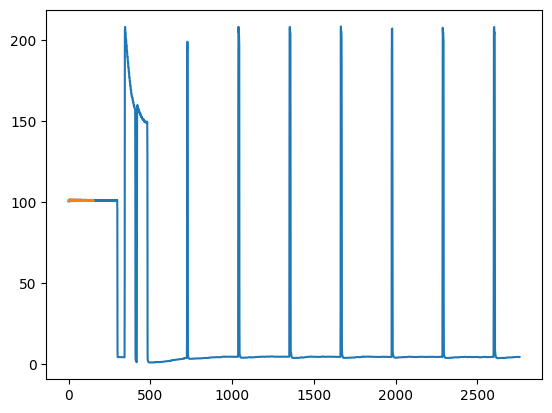

In [66]:
pixel_avg = np.array(list(map(np.mean, frames)))
plt.plot(pixel_avg)
plt.plot(pixel_avg[:len(sync_save)])

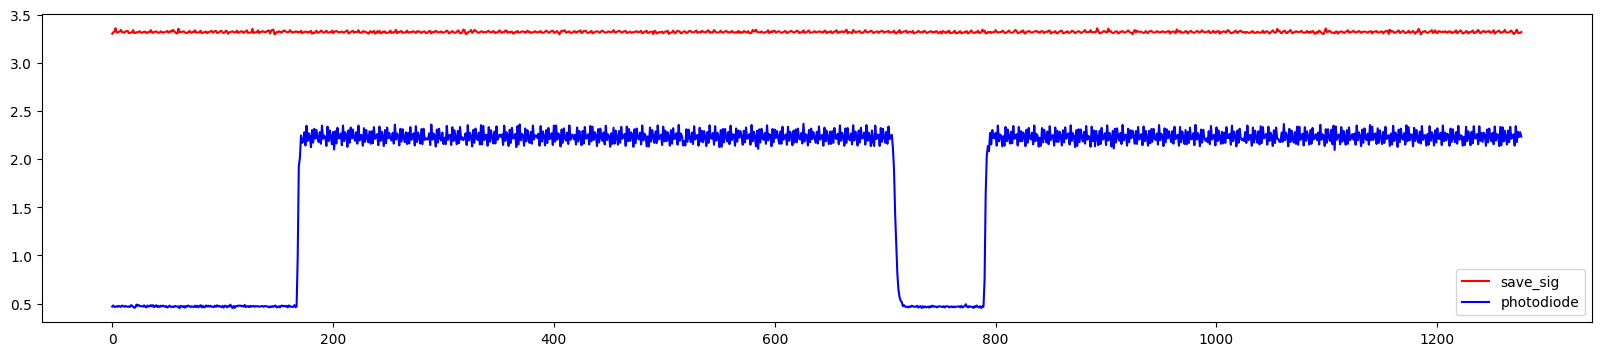

In [67]:
f, ax = plt.subplots(figsize=(20, 4))
plt.plot(save_sig, label='save_sig', color='red')
plt.plot(photodiode, label='photodiode', color='blue')
# plt.plot(frame_sig, label='sync_sig', color='black')
# filter out noise where if pixel_avg is less than 50, set to 0
pixel_avg[pixel_avg < 50] = 0
# and if it's greater than 50, set to 3.3
pixel_avg[pixel_avg > 50] = 3.3
# first_cam_frame = np.where(pixel_avg > 1)[0][0]
# plot each frame where sync and save signals are high
# plt.plot(sync_save, pixel_avg)
plt.legend()
plt.show()
plt.close()

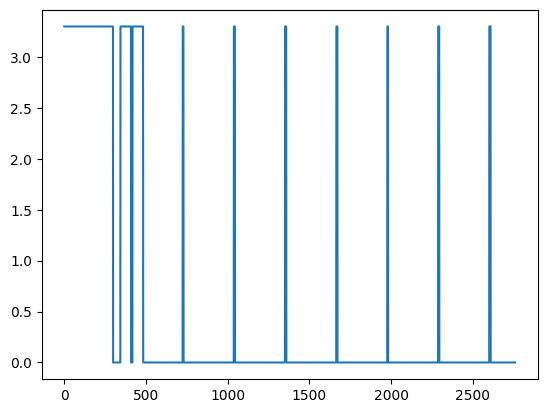

In [68]:
plt.plot(pixel_avg)

In [47]:
print('First Sync Frame: {}'.format(first_sync_frame))
print('First Save Frame: {}'.format(first_save_frame))
print('First Photodiode Frame: {}'.format(first_photodiode_frame))
print('First Cam Frame: {}'.format(first_cam_frame))

First Sync Frame: 3
First Save Frame: 0
First Photodiode Frame: 169


NameError: name 'first_cam_frame' is not defined

In [59]:
sync_save
pixel_avg = np.array(list(map(np.mean, frames)))
# find where the pixel average is less than 100
np.where(pixel_avg < 100)[0][0]

298

***
## Photodiode -> Save Signal

### Test #1

In [86]:
import pprint
ROOT = '/Users/rahimhashim/Library/CloudStorage/GoogleDrive-rh2898@columbia.edu/.shortcut-targets-by-id/1weRx7ojG3amil91WgRMeTUVxse__Rsyt/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/'
DATA_ROOT = os.path.join(ROOT, 'data_Probabilistic_Reward_Airpuff_Choice/')
try:
  file_name = os.path.join(DATA_ROOT, '230811_Test5_cam.h5')
  f = h5py.File(file_name, 'r')
except:
  # print each file as a line using pprint
  pprint.pprint(sorted(os.listdir(ROOT), reverse=True))
  raise Exception('File not found')
frame_sig = np.array(f['ML']['Trial1']['AnalogData']['General']['Gen2'])[0]
save_sig = np.array(f['ML']['Trial1']['AnalogData']['General']['Gen3'])[0]
photodiode = np.array(f['ML']['Trial1']['AnalogData']['PhotoDiode'])[0]

first_save_frame = np.where(save_sig > 1)[0][0]
first_photodiode_frame = np.where(photodiode > 1)[0][0]
first_sync_frame = np.where(frame_sig > 1)[0][0]
# find where edge of sync and save frames are both high, which means the sync pulse goes from <1 to >1
frame_sig_high = np.array([i for i, x in enumerate(frame_sig) if x > 1 and frame_sig[i-1] < 1])
frame_sig_array = np.zeros(len(frame_sig))
frame_sig_array[frame_sig_high] = 1
# see where frame_sig_array and save_sig are high
sync_save = np.where((frame_sig_array > 0) & (save_sig > 1))[0]
# sync_save = np.where((frame_sig > 1) & (save_sig > 1))[0]

In [92]:
VIDEO_ROOT = os.path.join(ROOT, 'videos')
try:
  video_path = os.path.join(ROOT, 'videos', '230811_Test5', '230811_Test5_0000')
  videos = os.listdir(video_path)
except:
  print('Video path not found')
  pprint(sorted(os.listdir(VIDEO_ROOT)), reverse=True)
  raise Exception('Video path not found')

# get frames
video_selected = videos[1]
video_file = os.path.join(video_path, video_selected)
frames, frame_size = get_frames(video_file)
pixel_avg = np.array(list(map(np.mean, frames)))

Video File:  /Users/rahimhashim/Library/CloudStorage/GoogleDrive-rh2898@columbia.edu/.shortcut-targets-by-id/1weRx7ojG3amil91WgRMeTUVxse__Rsyt/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230811_Test5/230811_Test5_0000/e3v83ad-20230811T100004-100104.avi
  Frame Count  :  7200
  Frame Rate   :  120
  Frame Size   :  640 x 480


In [93]:
print(len(sync_save), sync_save)

79 [1621 1630 1638 1646 1655 1663 1671 1680 1688 1696 1705 1713 1721 1730
 1738 1746 1755 1763 1771 1780 1788 1796 1805 1813 1821 1830 1838 1846
 1855 1863 1871 1880 1888 1896 1905 1913 1921 1930 1938 1946 1955 1963
 1971 1980 1988 1996 2005 2013 2021 2030 2038 2046 2055 2063 2071 2080
 2088 2096 2105 2113 2121 2130 2138 2146 2155 2163 2171 2180 2188 2196
 2205 2213 2221 2230 2238 2246 2255 2263 2271]


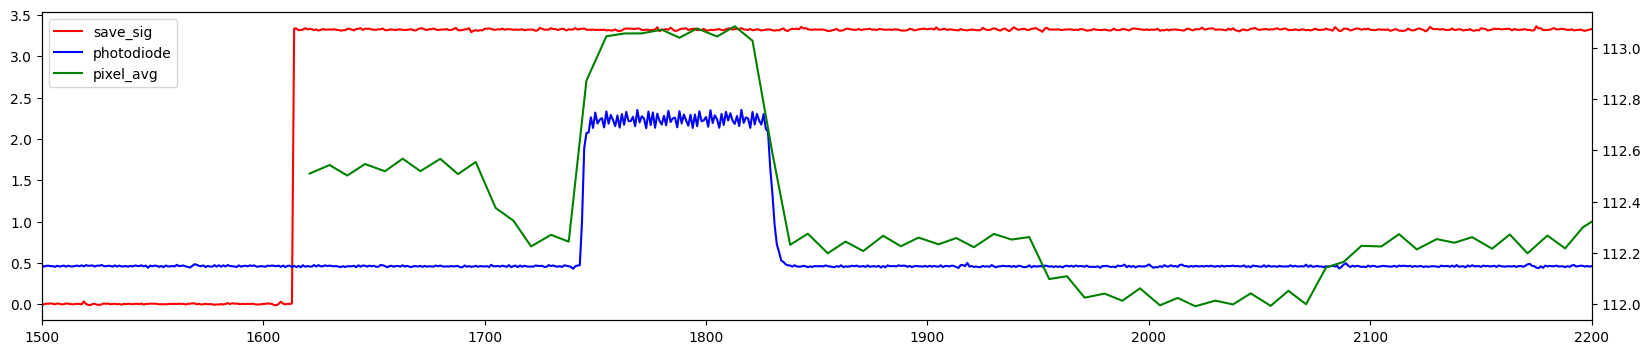

In [106]:
f, ax = plt.subplots(figsize=(20, 4))
plt.plot(save_sig, label='save_sig', color='red')
plt.plot(photodiode, label='photodiode', color='blue')
# plt.plot(frame_sig, label='sync_sig', color='black')
# filter out noise where if pixel_avg is less than 50, set to 0
# first_cam_frame = np.where(pixel_avg > 1)[0][0]
# plot each frame where sync and save signals are high
# plt.plot(sync_save, pixel_avg)
# twin plot with pixel avg on second y axis
ax2 = ax.twinx()
ax2.plot(sync_save, pixel_avg[:len(sync_save)], label='pixel_avg', color='green')
# combine ax and ax2 legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
ax.set_xlim(1500, 2200)
ax2.set_xlim(1500, 2200)
plt.show()
plt.close()

***
### Test #3

In [107]:
import pprint
ROOT = '/Users/rahimhashim/Library/CloudStorage/GoogleDrive-rh2898@columbia.edu/.shortcut-targets-by-id/1weRx7ojG3amil91WgRMeTUVxse__Rsyt/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/'
DATA_ROOT = os.path.join(ROOT, 'data_Probabilistic_Reward_Airpuff_Choice/')
try:
  file_name = os.path.join(DATA_ROOT, '230811_Test6_cam.h5')
  f = h5py.File(file_name, 'r')
except:
  # print each file as a line using pprint
  pprint.pprint(sorted(os.listdir(ROOT), reverse=True))
  raise Exception('File not found')
frame_sig = np.array(f['ML']['Trial1']['AnalogData']['General']['Gen2'])[0]
save_sig = np.array(f['ML']['Trial1']['AnalogData']['General']['Gen3'])[0]
photodiode = np.array(f['ML']['Trial1']['AnalogData']['PhotoDiode'])[0]

first_save_frame = np.where(save_sig > 1)[0][0]
first_photodiode_frame = np.where(photodiode > 1)[0][0]
first_sync_frame = np.where(frame_sig > 1)[0][0]
# find where edge of sync and save frames are both high, which means the sync pulse goes from <1 to >1
frame_sig_high = np.array([i for i, x in enumerate(frame_sig) if x > 1 and frame_sig[i-1] < 1])
frame_sig_array = np.zeros(len(frame_sig))
frame_sig_array[frame_sig_high] = 1
# see where frame_sig_array and save_sig are high
sync_save = np.where((frame_sig_array > 0) & (save_sig > 1))[0]
# sync_save = np.where((frame_sig > 1) & (save_sig > 1))[0]

In [111]:
VIDEO_ROOT = os.path.join(ROOT, 'videos')
try:
  video_path = os.path.join(ROOT, 'videos', '230811_Test6', '230811_Test6_0000')
  videos = os.listdir(video_path)
except:
  print('Video path not found')
  pprint(sorted(os.listdir(VIDEO_ROOT)), reverse=True)
  raise Exception('Video path not found')

# get frames
video_selected = videos[1]
video_file = os.path.join(video_path, video_selected)
frames, frame_size = get_frames(video_file)
pixel_avg = np.array(list(map(np.mean, frames)))

Video File:  /Users/rahimhashim/Library/CloudStorage/GoogleDrive-rh2898@columbia.edu/.shortcut-targets-by-id/1weRx7ojG3amil91WgRMeTUVxse__Rsyt/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos/230811_Test6/230811_Test6_0000/e3v83d6-20230811T103132-103141.avi
  Frame Count  :  1080
  Frame Rate   :  120
  Frame Size   :  640 x 480


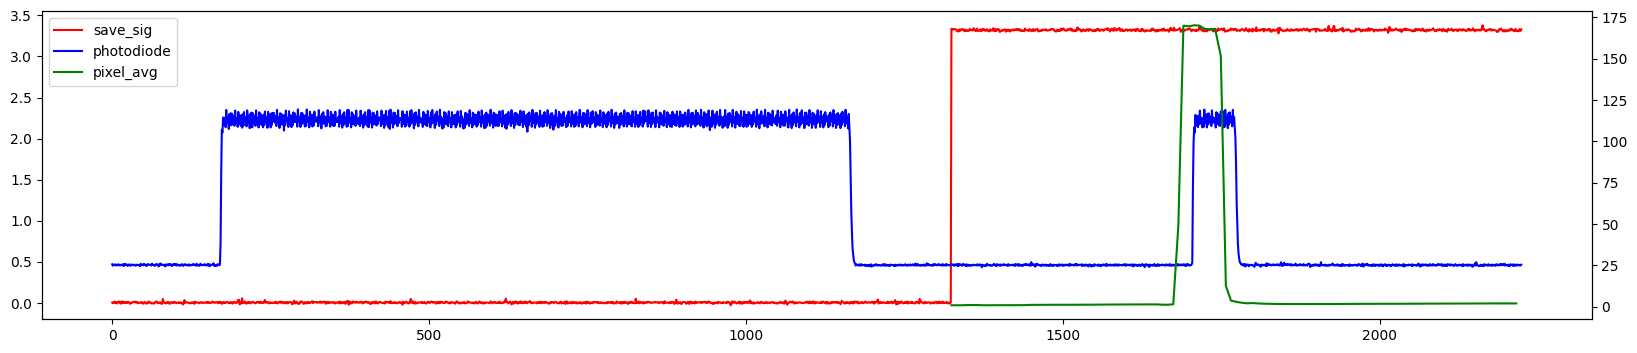

In [115]:
f, ax = plt.subplots(figsize=(20, 4))
plt.plot(save_sig, label='save_sig', color='red')
plt.plot(photodiode, label='photodiode', color='blue')
# plt.plot(frame_sig, label='sync_sig', color='black')
# filter out noise where if pixel_avg is less than 50, set to 0
# first_cam_frame = np.where(pixel_avg > 1)[0][0]
# plot each frame where sync and save signals are high
# plt.plot(sync_save, pixel_avg)
# twin plot with pixel avg on second y axis
ax2 = ax.twinx()
ax2.plot(sync_save, pixel_avg[:len(sync_save)], label='pixel_avg', color='green')
# combine ax and ax2 legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
# ax.set_xlim(1600, 2200)
# ax2.set_xlim(1600, 2200)
plt.show()
plt.close()

In [110]:
print(len(sync_save), sync_save)

108 [1324 1332 1340 1349 1357 1365 1374 1382 1390 1399 1407 1415 1424 1432
 1440 1449 1457 1465 1474 1482 1490 1499 1507 1515 1524 1532 1540 1549
 1557 1565 1574 1582 1590 1599 1607 1615 1624 1632 1640 1649 1657 1665
 1674 1682 1690 1699 1707 1715 1724 1732 1740 1749 1757 1765 1774 1782
 1790 1799 1807 1815 1824 1832 1840 1849 1857 1865 1874 1882 1890 1899
 1907 1915 1924 1932 1940 1949 1957 1965 1974 1982 1990 1999 2007 2015
 2024 2032 2040 2049 2057 2065 2074 2082 2090 2099 2107 2115 2124 2132
 2140 2149 2157 2165 2174 2182 2190 2199 2207 2215]
